In [2]:
import pandas as pd
import collections

In [3]:
lab = pd.read_excel('./database_model_health_center/lab.xlsx')

In [6]:
lab.head()

,KZZ,obravnava,datum_ura,parameter,vrednost,oddelek
0,500133,22471,2007-10-13 09:55:00,Bazofilci,0.091128,2301
1,500133,22471,2007-10-13 09:55:00,Bazofilci #,0.000000,2301
2,500133,22471,2007-10-13 09:55:00,Eozinofilci,0.000000,2301
3,500133,22471,2007-10-13 09:55:00,Eozinofilci #,0.000000,2301
4,500133,22471,2007-10-13 09:55:00,K-Erci,3.822534,2301


In [5]:
diag = pd.read_excel('./database_model_health_center/diag.xlsx')

In [7]:
diag.head()

,KZZ,obravnava,st_diagnoze,diagnoza,starost,spol,oddelek
0,503001,21028,1,I11.0,96,Z,2308
1,503001,21028,2,I44.7,96,Z,2308
2,503001,21028,3,I48,96,Z,2308
3,503001,21028,4,I50.0,96,Z,2308
4,503001,21028,5,J18.9,96,Z,2308


In [18]:
top_5_diagnosis_per_department_with_names = diag.groupby(['oddelek', 'diagnoza']).size().reset_index(name='count').sort_values(['oddelek', 'count'], ascending=[True, False]).groupby('oddelek').head(5)

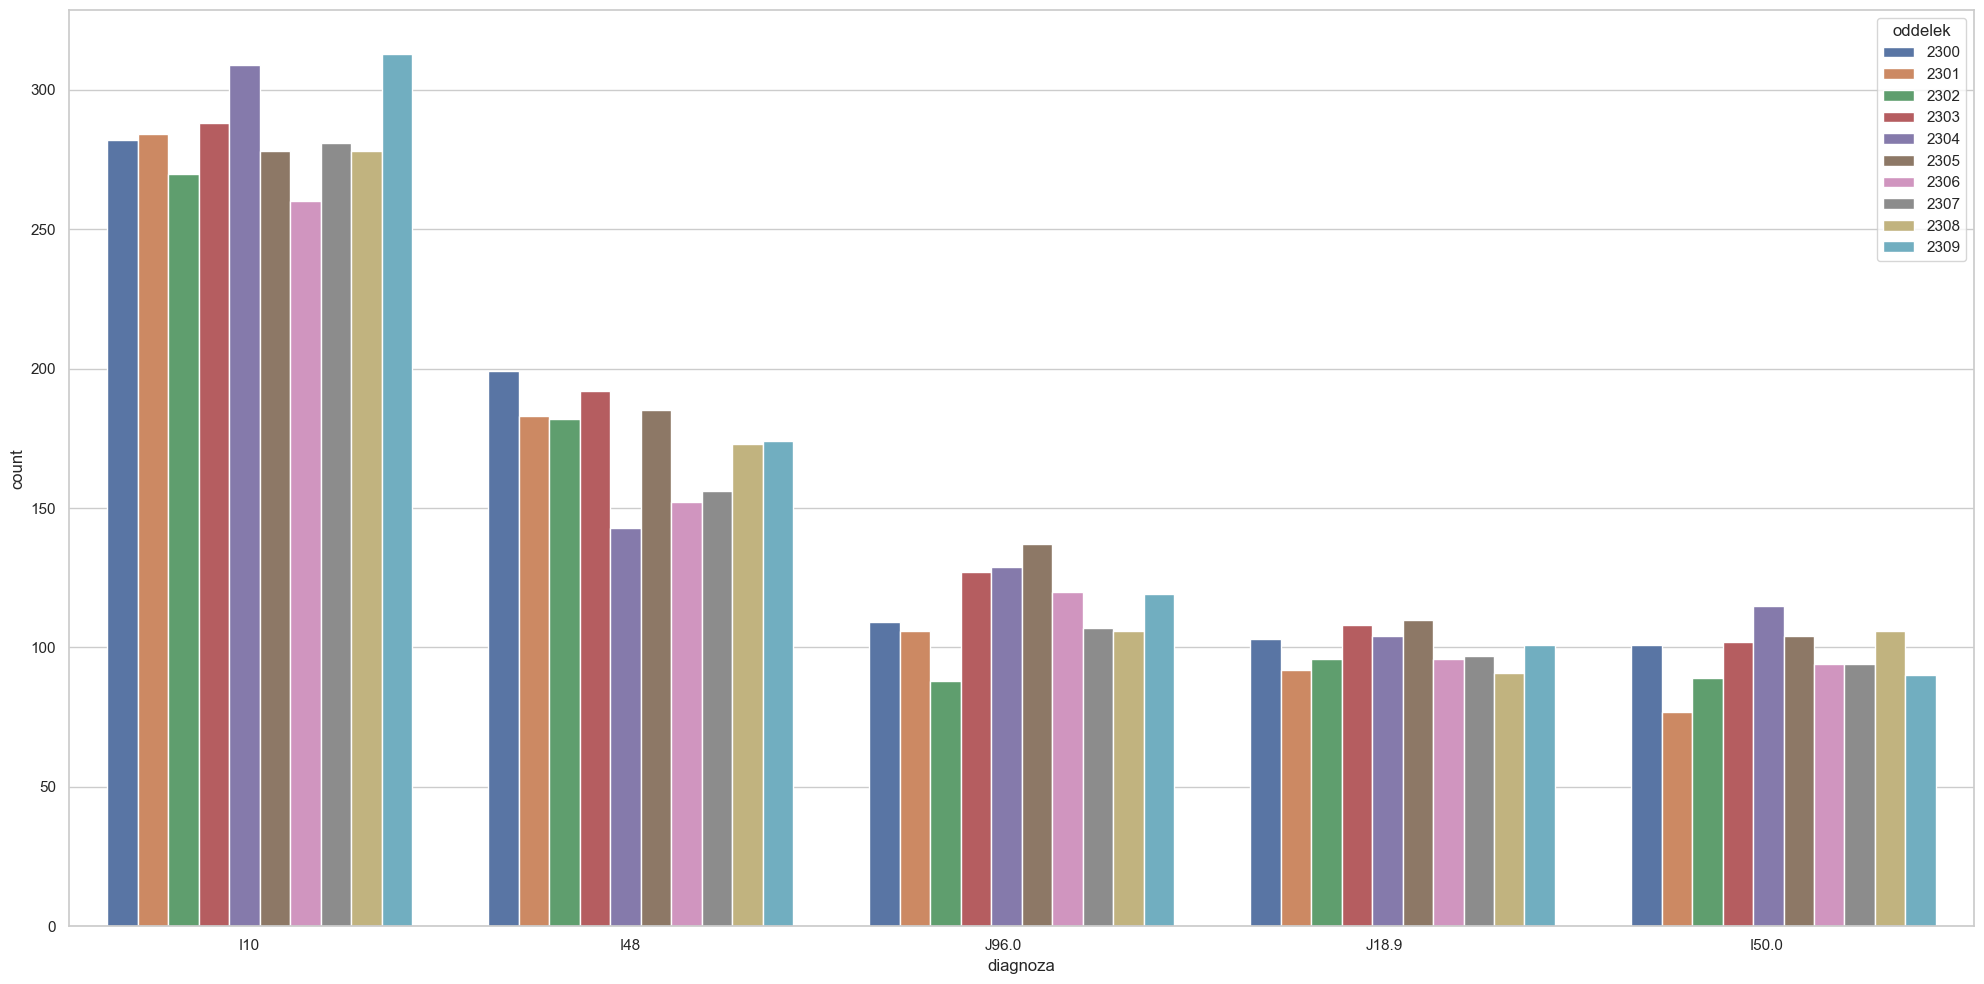

In [25]:
# create graph wtih 'diagnoza' as x-axis and 'count' as y-axis with hue as 'oddelek'
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

ax = sns.barplot(x="diagnoza", y="count", hue="oddelek", data=top_5_diagnosis_per_department_with_names)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [27]:
top_5_diagnosis_per_gender = diag.groupby(['spol', 'diagnoza']).size().reset_index(name='count').sort_values(['spol', 'count'], ascending=[True, False]).groupby('spol').head(5)

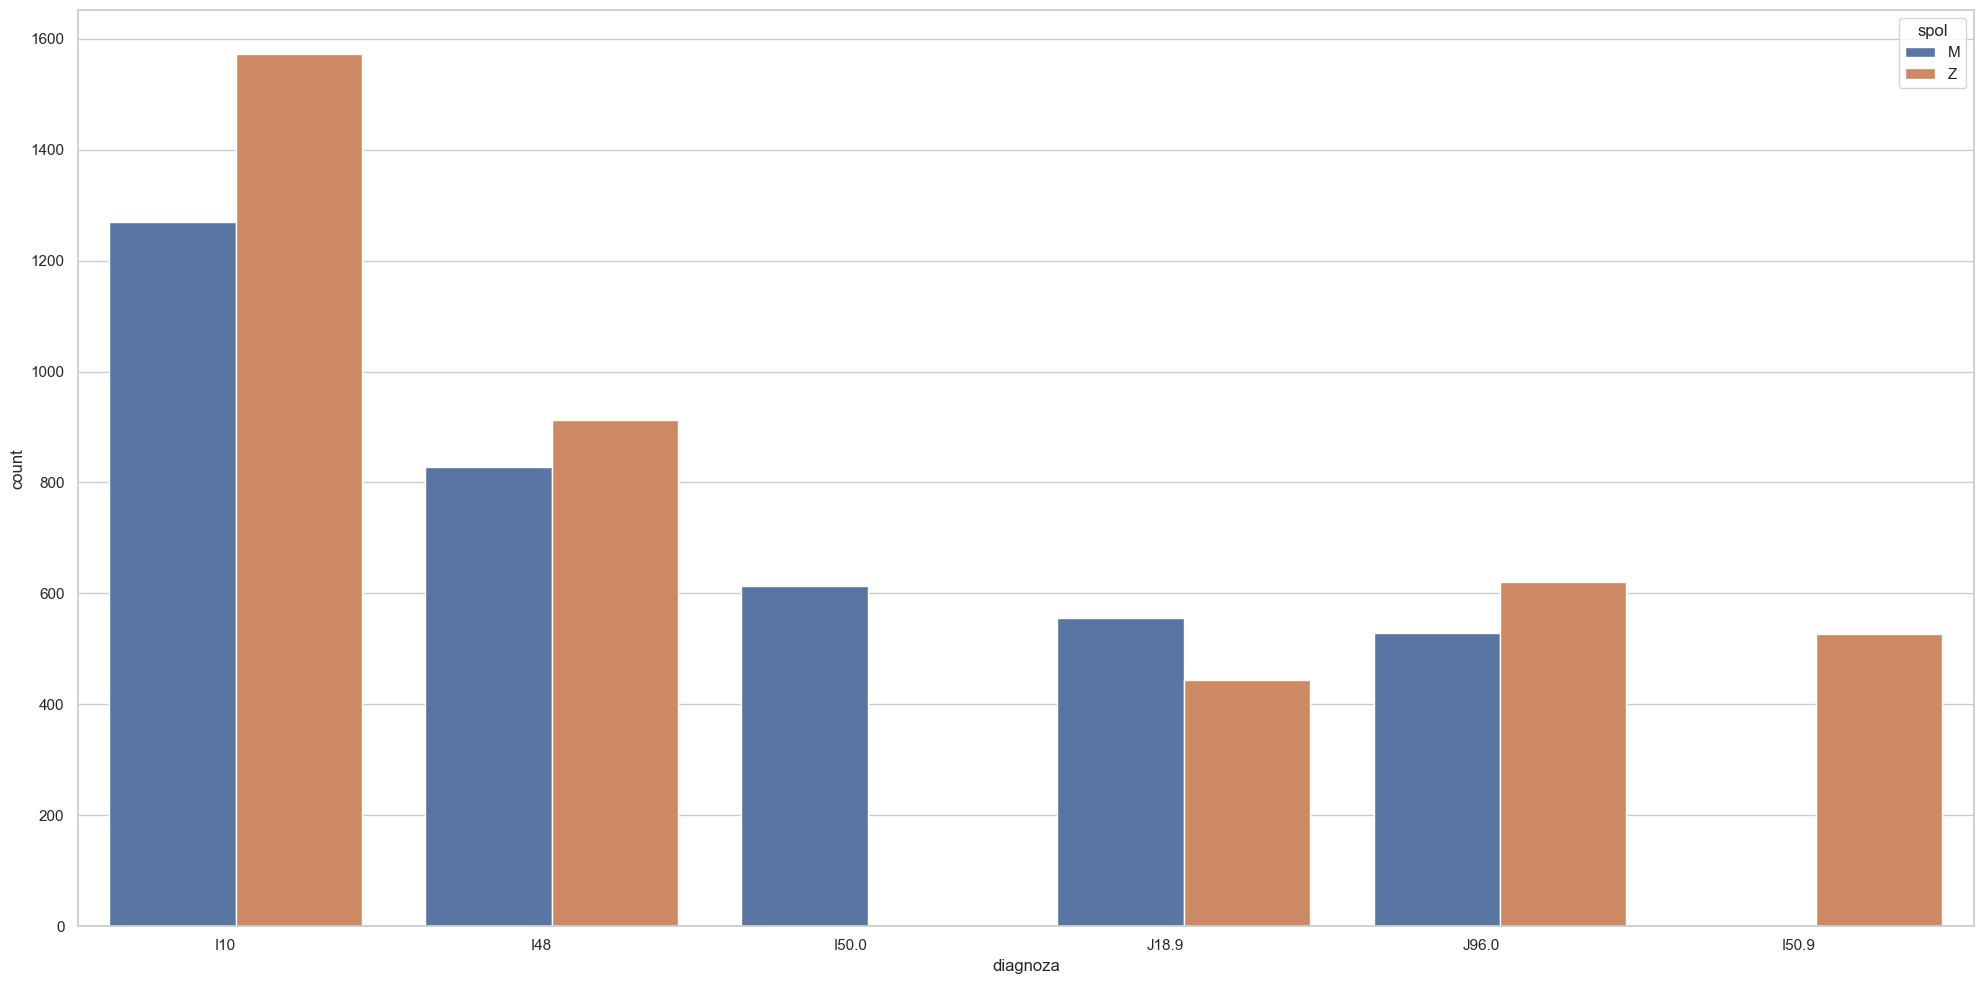

In [28]:
# create graph wtih 'diagnoza' as x-axis and 'count' as y-axis with hue as 'spol'

sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

ax = sns.barplot(x="diagnoza", y="count", hue="spol", data=top_5_diagnosis_per_gender)

ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()
plt.show()